Actividad: Regresión Lineal
- 17 de Agosto de 2023
- Karla González Sánchez A01541526

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estadistica/ds_salaries.csv')

##Preparación de datos

In [120]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [121]:
df.shape

(607, 12)

Base de datos completa, no se observan valores faltantes.

In [122]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Se eliminan las columnas que no proporcionan información tan relevante en el modelo, y que no forman parte de las variables regresoras ni de la variable independiente.

In [123]:
index_to_drop = df.columns.get_loc('Unnamed: 0')
df.drop(df.columns[index_to_drop], axis=1, inplace=True)
df.drop('work_year', axis = 1, inplace = True)
df.drop('job_title', axis = 1, inplace = True)
df.drop('salary_currency', axis = 1, inplace = True)
df.drop('employee_residence', axis = 1, inplace = True)
df.drop('company_location', axis = 1, inplace = True)
df.drop('company_size', axis = 1, inplace = True)

In [124]:
df.head()

,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,MI,FT,70000,79833,0
1,SE,FT,260000,260000,0
2,SE,FT,85000,109024,50
3,MI,FT,20000,20000,0
4,SE,FT,150000,150000,50


In [125]:
experience_levels = df['experience_level'].unique()
employment_types = df['employment_type'].unique()

print("Valores de 'experience_level':", experience_levels)
print("Valores de 'employment_type':", employment_types)

Valores de 'experience_level': ['MI' 'SE' 'EN' 'EX']
Valores de 'employment_type': ['FT' 'CT' 'PT' 'FL']


 Uso de las variables Dummy para representar información categórica como valores binarios (0 o 1), y poder hacer su respectivo análisis.

In [126]:
dummies_experience = pd.get_dummies(df['experience_level'], prefix='experience_level')
dummies_employment = pd.get_dummies(df['employment_type'], prefix='employment_type')

# Mostrar las tablas de dummies en formato de tabla
print("Tabla de dummies para 'experience_level':")
display(dummies_experience)

print("\nTabla de dummies para 'employment_type':")
display(dummies_employment)

Tabla de dummies para 'experience_level':


,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1



Tabla de dummies para 'employment_type':


,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


In [127]:
df = pd.concat([df, dummies_employment, dummies_experience], axis = 1)
df.drop('experience_level', axis = 1, inplace = True)
df.drop('employment_type', axis = 1, inplace = True)
df.head()

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,70000,79833,0,0,0,1,0,0,0,1,0
1,260000,260000,0,0,0,1,0,0,0,0,1
2,85000,109024,50,0,0,1,0,0,0,0,1
3,20000,20000,0,0,0,1,0,0,0,1,0
4,150000,150000,50,0,0,1,0,0,0,0,1


##Correlación
No se observan valores de correlación fuertemente positivos o negativos, lo que indica una relación lineal poco significativa y podría tener una capacidad de predicción limitada.

In [128]:
correlation_matrix = df.corr()
display(correlation_matrix)

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
salary,1.000000,-0.083906,-0.014608,-0.008268,-0.014568,0.025685,-0.020006,-0.015845,0.014130,0.074626,-0.065995
salary_in_usd,-0.083906,1.000000,0.132122,0.092907,-0.073863,0.091819,-0.144627,-0.294196,0.259866,-0.252024,0.343513
remote_ratio,-0.014608,0.132122,1.000000,0.065149,-0.016865,-0.023834,-0.002935,-0.010490,0.041208,-0.127850,0.113071
employment_type_CT,-0.008268,0.092907,0.065149,1.000000,-0.007423,-0.506989,-0.011795,0.066013,0.070739,-0.028817,-0.047768
employment_type_FL,-0.014568,-0.073863,-0.016865,-0.007423,1.000000,-0.453089,-0.010541,-0.033537,-0.017229,0.068108,-0.034520
employment_type_FT,0.025685,0.091819,-0.023834,-0.506989,-0.453089,1.000000,-0.719987,-0.167828,-0.008698,-0.006597,0.128381
employment_type_PT,-0.020006,-0.144627,-0.002935,-0.011795,-0.010541,-0.719987,1.000000,0.204028,-0.027379,-0.013805,-0.119762
experience_level_EN,-0.015845,-0.294196,-0.010490,0.066013,-0.033537,-0.167828,0.204028,1.000000,-0.087108,-0.302761,-0.381033
experience_level_EX,0.014130,0.259866,0.041208,0.070739,-0.017229,-0.008698,-0.027379,-0.087108,1.000000,-0.155539,-0.195751
experience_level_MI,0.074626,-0.252024,-0.127850,-0.028817,0.068108,-0.006597,-0.013805,-0.302761,-0.155539,1.000000,-0.680373


In [129]:
high_positive_correlation = np.where((correlation_matrix > 0.95) & (correlation_matrix < 1))
for i in high_positive_correlation:
    print(i)

[]
[]


In [130]:
high_negative_correlation = np.where((correlation_matrix < -0.95) & (correlation_matrix > -1))
for i in high_negative_correlation:
    print(i)

[]
[]


##Estandarización
Transformación de las variables originales para que tengan una media de cero y una desviación estándar de uno. Así, todas las variables se encuentran en la misma escala.

In [131]:
scaler = StandardScaler()
standard_values = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_values, columns = df.columns)
display(standard_df)

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,-0.164605,-0.457904,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
1,-0.041475,2.083282,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
2,-0.154885,-0.046177,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
3,-0.197008,-1.301826,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
4,-0.112761,0.531774,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
...,...,...,...,...,...,...,...,...,...,...,...
602,-0.110169,0.588192,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
603,-0.128314,0.193263,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
604,-0.126370,0.235577,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
605,-0.112761,0.531774,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674


##OLS

In [132]:
training_df, testing_df = train_test_split(standard_df, test_size = 0.20)
display(training_df)
display(testing_df)

,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
57,-0.133499,0.080426,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
477,-0.067398,1.519097,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
302,-0.115353,0.475356,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
143,-0.156505,-0.420287,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
485,-0.132203,0.108636,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
...,...,...,...,...,...,...,...,...,...,...,...
262,0.600097,-1.345494,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
461,-0.145164,-0.173457,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,2.428524,-0.211543,-0.735261,-0.925348
265,-0.106281,0.672820,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
428,-0.118982,0.396370,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674


,salary,salary_in_usd,remote_ratio,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
402,-0.134838,0.051286,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
372,-0.103043,0.743287,-1.743615,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
162,-0.194416,-1.183784,-0.514377,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
517,-0.169790,-0.622731,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
363,-0.170243,-0.719305,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
...,...,...,...,...,...,...,...,...,...,...,...
465,-0.132203,0.108636,0.714862,-0.091135,-0.081446,0.179758,-0.129423,2.428524,-0.211543,-0.735261,-0.925348
286,-0.153588,-0.133414,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674
147,-0.151644,-0.314503,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,1.360061,-0.925348
481,-0.167846,-0.667118,0.714862,-0.091135,-0.081446,0.179758,-0.129423,-0.411773,-0.211543,-0.735261,1.080674


In [133]:
ols_model = smf.ols(formula = 'salary_in_usd ~ salary + remote_ratio + employment_type_CT + employment_type_FL + employment_type_FT + employment_type_PT + experience_level_EN + experience_level_EX + experience_level_MI + experience_level_SE', data = training_df)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     25.35
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.33e-32
Time:                        04:48:47   Log-Likelihood:                -584.48
No. Observations:                 485   AIC:                             1187.
Df Residuals:                     476   BIC:                             1225.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0092    

Se elimina "salary", "employment_type_FL", "employment_type_FT" y "employment_type_PT" por sus p-valores mayores a 0.05, ya que eso significa que estas variables no son estadísticamente significativas en el modelo.

In [134]:
ols_model = smf.ols(formula = 'salary_in_usd ~ remote_ratio + employment_type_CT + experience_level_EN + experience_level_EX + experience_level_MI + experience_level_SE', data = training_df)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     38.47
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           3.34e-33
Time:                        04:48:47   Log-Likelihood:                -588.66
No. Observations:                 485   AIC:                             1189.
Df Residuals:                     479   BIC:                             1214.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0106    

Se observa un valor de R-squared de 0.278. Esto significa que aproximadamente el 27.8% de la variabilidad en la variable de respuesta ("salary_in_usd") es explicada por las variables predictoras incluidas en el modelo. Dicho de otra manera, el modelo puede explicar alrededor del 27.8% de las fluctuaciones observadas en los salarios en dólares estadounidenses.



##Comparación entre datos reales y predicción

In [135]:
predicted_salaries = coefficients['Intercept'] + testing_df[significant_features].dot(coefficients[significant_features])
predicted_df = pd.DataFrame({'Real': testing_df['salary_in_usd'],'Predicted': predicted_salaries, 'Error': testing_df['salary_in_usd'] - predicted_salaries}, index=testing_df.index)
display(predicted_df)

,Real,Predicted,Error
402,0.051286,0.408630,-0.357344
372,0.743287,0.408630,0.334656
162,-1.183784,-0.276132,-0.907652
517,-0.622731,-0.276132,-0.346599
363,-0.719305,0.408630,-1.127936
...,...,...,...
465,0.108636,-0.685413,0.794048
286,-0.133414,0.408630,-0.542044
147,-0.314503,-0.276132,-0.038371
481,-0.667118,0.408630,-1.075749


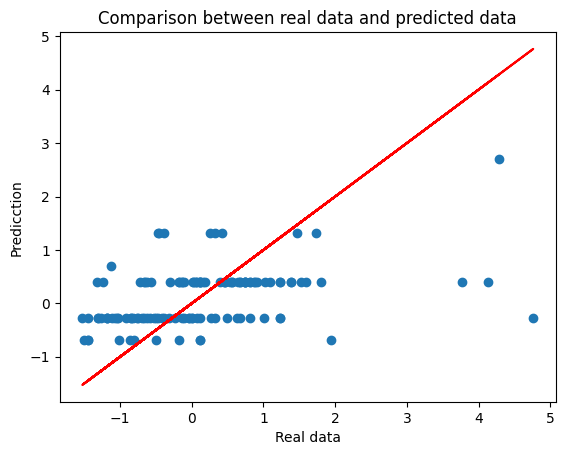

In [136]:
plt.scatter(predicted_df['Real'], predicted_df['Predicted'])
plt.plot(predicted_df['Real'], predicted_df['Real'], color = 'red')
plt.xlabel("Real data")
plt.ylabel("Predicction")
plt.title('Comparison between real data and predicted data')
plt.show()

##Errores

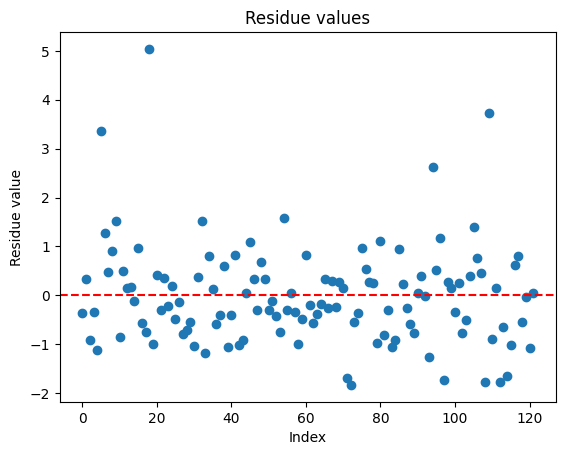

In [137]:
plt.scatter(range(len(predicted_df['Error'])), predicted_df['Error'])
plt.axhline(y = 0, linestyle = '--', color = 'red')
plt.title('Residue values')
plt.ylabel('Residue value')
plt.xlabel('Index')
plt.show()

Text(0, 0.5, 'Frequency')

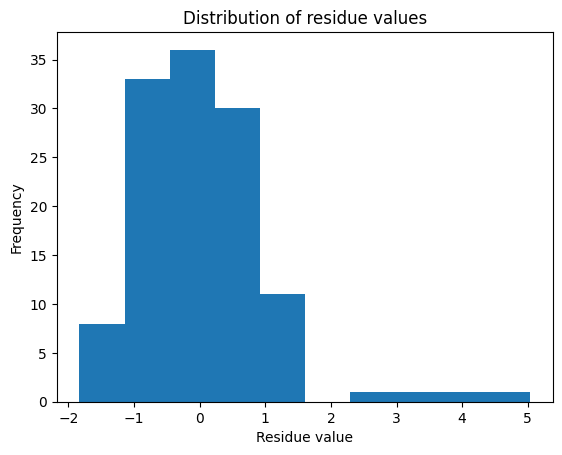

In [138]:
plt.hist(x  = predicted_df['Error'],)
plt.title('Distribution of residue values')
plt.xlabel('Residue value')
plt.ylabel('Frequency')

In [139]:
print('Error mean: ' + str(predicted_df['Error'].mean()))
print('Standard deviation: ' + str(predicted_df['Error'].std()))

Error mean: -0.014400579959640362
Standard deviation: 1.03085301469428


In [140]:
standardized_errors = (predicted_df['Error'] - predicted_df['Error'].mean()) / predicted_df['Error'].std()
display(pd.DataFrame(standardized_errors))

,Error
402,-0.332679
372,0.338610
162,-0.866517
517,-0.322256
363,-1.080207
...,...
465,0.784252
286,-0.511851
147,-0.023253
481,-1.029582


##QQ-plot

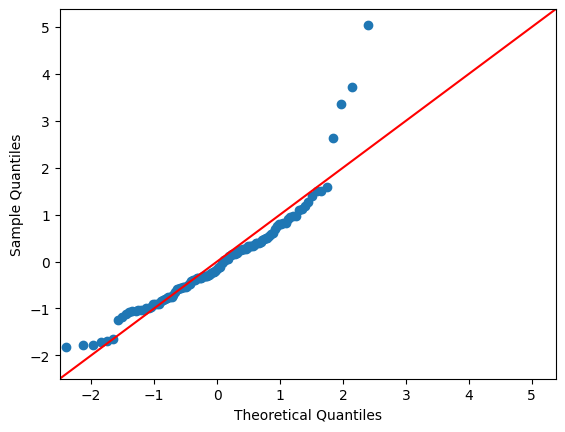

In [141]:
QQ = sm.qqplot(predicted_df['Error'], stats.norm, line='45')